In [182]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_html('https://results.eci.gov.in/PcResultGenJune2024/index.htm')

In [97]:
loksabha=df[0]

In [99]:
size=len(loksabha)

In [101]:
loksabha=loksabha[:size-1]

In [102]:
loksabha

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


In [155]:
ind=loksabha['Party']

In [12]:
from bs4 import BeautifulSoup
import requests

In [13]:
url='https://results.eci.gov.in/PcResultGenJune2024/index.htm'

In [14]:
page=requests.get(url)

In [15]:
soup=BeautifulSoup(page.text,'html')

In [16]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_conf

In [18]:
s=soup.find_all('a')

In [24]:
siz=len(s)

In [30]:
html_links=s[7:siz-2]

In [35]:
urls = []
for tag in html_links:
    soup = BeautifulSoup(f'<div>{tag}</div>', 'lxml')
    a_tag = soup.find('a')
    if a_tag and 'href' in a_tag.attrs:
        urls.append(a_tag['href'])

In [135]:
tables=[]
x=0
for i in urls:
    url = 'https://results.eci.gov.in/PcResultGenJune2024/'+i
    result = pd.read_html(url)
    tables.append(pd.read_html(url))
    x=x+1

pandas.core.series.Series

In [138]:
for i in range(len(tables)):
    if 'Total Votes' in tables[i][0].columns:
        tables[i][0]['Total Votes'] = pd.to_numeric(tables[i][0]['Total Votes'], errors='coerce').fillna(0).astype(int)


In [139]:
tables[0][0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   S.No                     240 non-null    int64 
 1   Parliament Constituency  240 non-null    object
 2   Winning Candidate        240 non-null    object
 3   Total Votes              240 non-null    int32 
 4   Margin                   240 non-null    object
dtypes: int32(1), int64(1), object(3)
memory usage: 8.6+ KB


# 1. total seats contested analysis

In [104]:
total_seat=loksabha['Total'].sum()
total_seat

543

# 2. total votes cast

In [142]:
total_votes=0
for i in tables:
    total_votes+=i[0]['Total Votes'].sum()
total_votes

326399758

# 3.Dominant Party

In [153]:
dominant_party=loksabha['Won'].max()
dominant_party
s=loksabha[loksabha['Won']==dominant_party]['Party']
print('The dominant part is:',s[0])
print('Number of seats won by this party is:',dominant_party)

The dominant part is: Bharatiya Janata Party - BJP
Number of seats won by this party is: 240


# 4.Vote Share by Party

In [203]:
party=[]
x=0
for i in tables:
    party.append(i[0]['Total Votes'].sum())
    x=x+1

In [221]:
party_votes=pd.DataFrame(party,columns=['Votes'],index=ind)

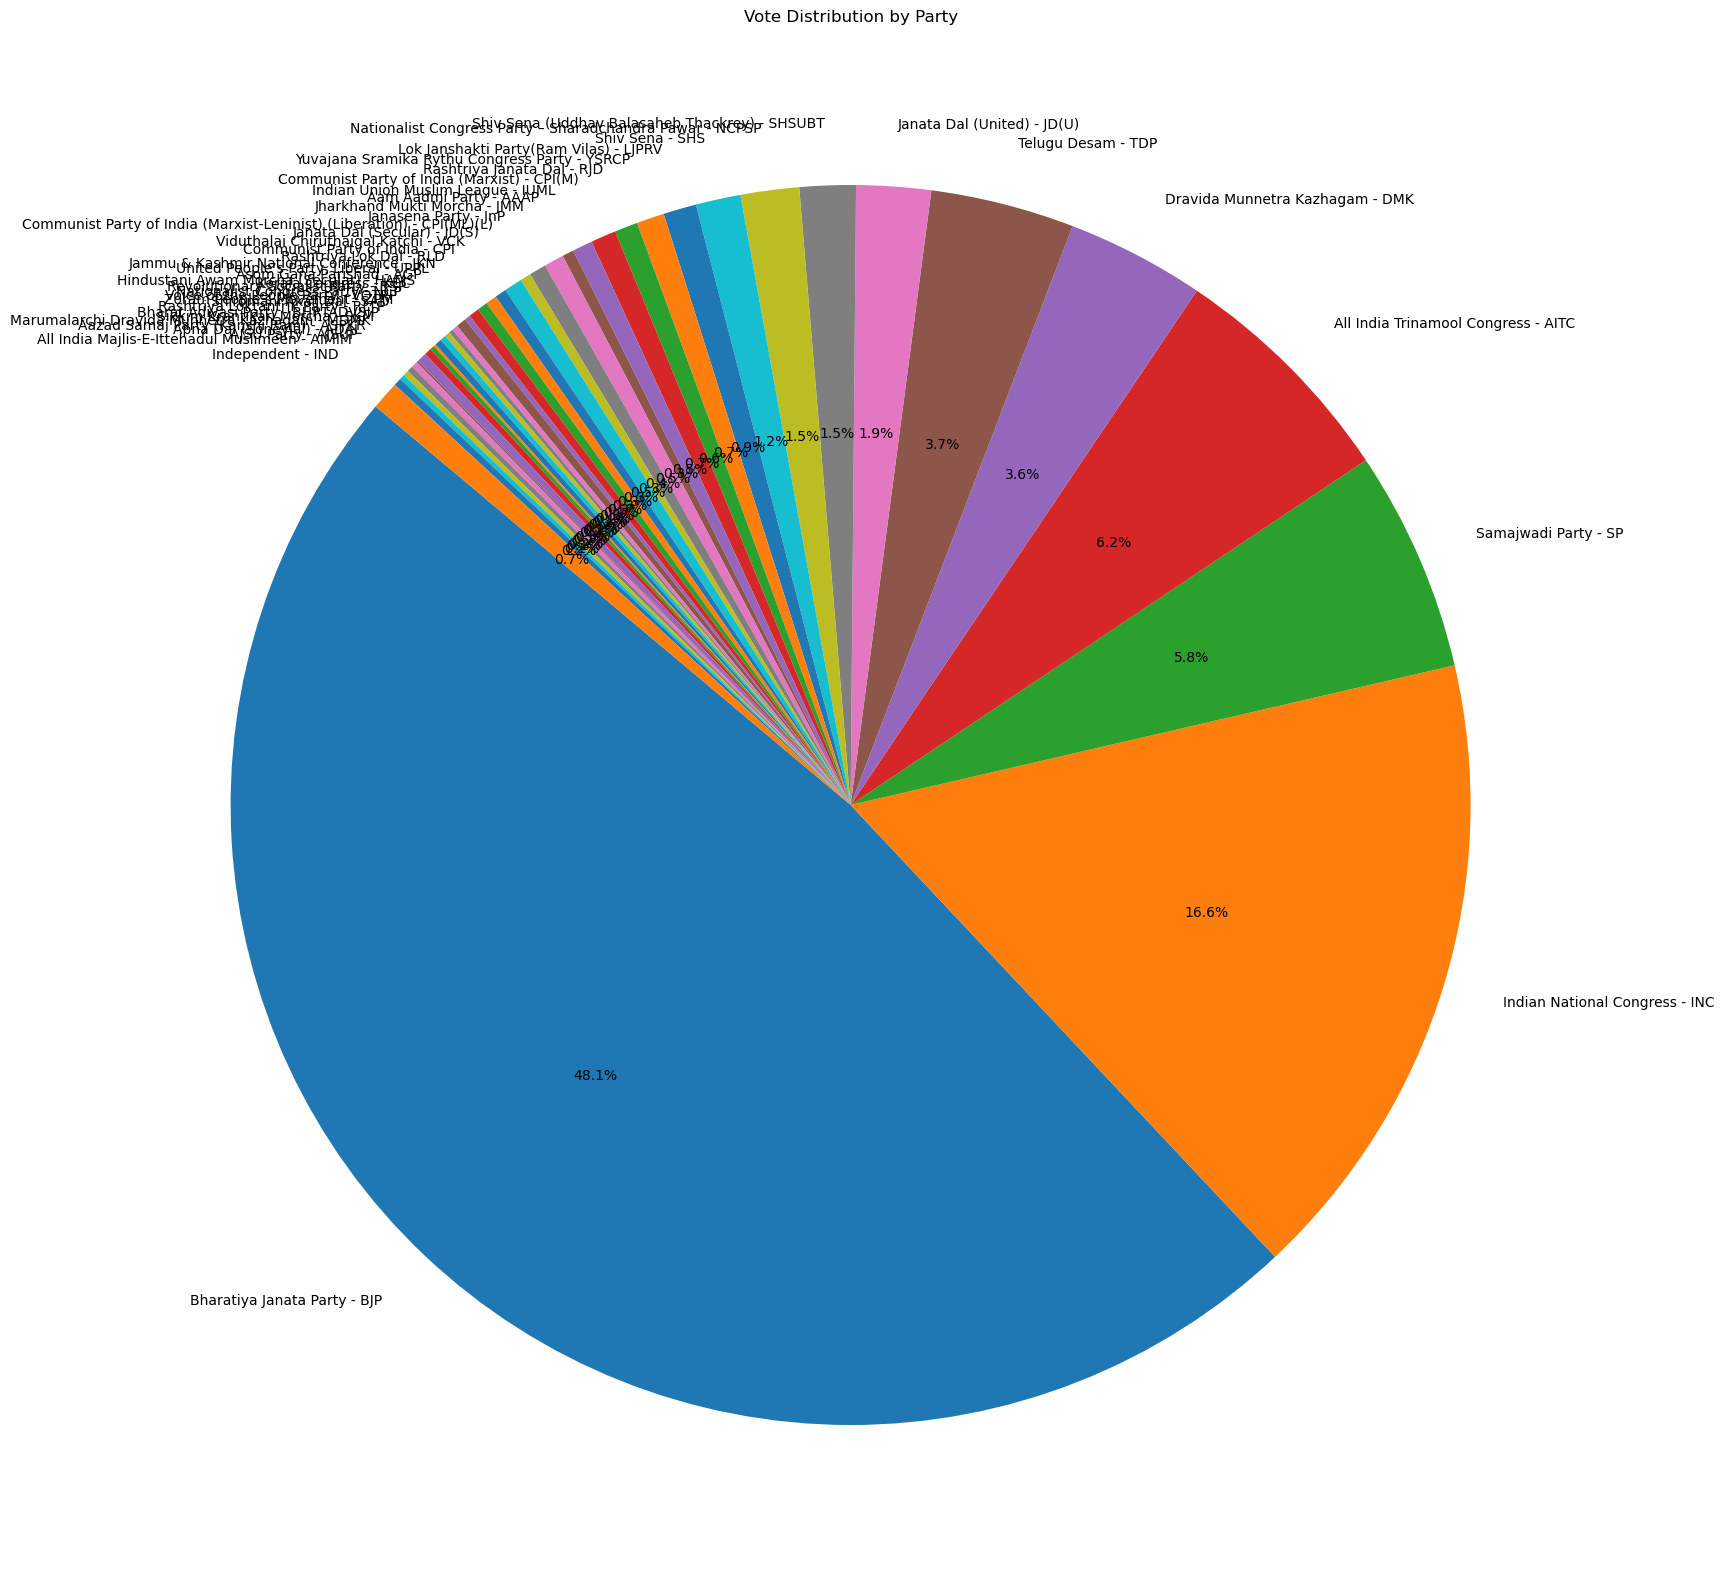

In [219]:
plt.figure(figsize=(20, 50))
plt.pie(party_votes['Votes'], labels=ind, autopct='%1.1f%%', startangle=140)
plt.title('Vote Distribution by Party')
plt.show()

In [222]:
party_votes

,Votes
Party,
Bharatiya Janata Party - BJP,157039540
Indian National Congress - INC,54233901
Samajwadi Party - SP,18826855
All India Trinamool Congress - AITC,20185370
Dravida Munnetra Kazhagam - DMK,11754710
Telugu Desam - TDP,12232822
Janata Dal (United) - JD(U),6335123
Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,4772796
Nationalist Congress Party – Sharadchandra Pawar - NCPSP,4971873
